## 1.

*Recogiendo los datos de coronavirus de la página https://ourworldindata.org/coronavirus-source-data* 

A partir de la letra de tu DNI, elige al país que empieza por dicha letra que más fallecidos tenga. Si el país elegido no está entre el top 20 de fallecidos, elige como país España.

En este caso, utilizaremos las columnas:

- Nuevos casos
- Nuevos fallecidos
- Población
- Fallecidos totales
- Casos totales

La fecha debe estar en el índice.

1. Representa todas las columnas en un gráfica con diferentes magnitudes en el eje y para su correcta visualización.

2. Elimina la columna "Población".

3. Entrena los algoritmos de regresión que hemos visto hasta ahora para predecir dos columnas por separado: Nuevos casos y Nuevos fallecidos. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento. ¿Qué error se comete? ¿crees que los algoritmos de ML vistos hasta ahora son buenos para realizar un forecast de una serie temporal viendo los resultados?

4. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones = 23 y n_repeats = 7 para este ejercicio y solo para la columna "nuevos casos".

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("../data/owid-covid-data.csv")

In [3]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96864,ZWE,Africa,Zimbabwe,2021-06-15,40318.0,241.0,142.429,1637.0,2.0,2.857,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
96865,ZWE,Africa,Zimbabwe,2021-06-16,40556.0,238.0,160.571,1640.0,3.0,2.571,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
96866,ZWE,Africa,Zimbabwe,2021-06-17,40927.0,371.0,204.429,1647.0,7.0,3.000,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
96867,ZWE,Africa,Zimbabwe,2021-06-18,41335.0,408.0,235.286,1656.0,9.0,3.857,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [3]:
df_spain = df[df['location'] == "Spain"]

In [4]:
df_spain

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
81984,ESP,Europe,Spain,2020-02-01,1.0,1.0,NaN,NaN,NaN,NaN,...,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,NaN
81985,ESP,Europe,Spain,2020-02-02,1.0,0.0,NaN,NaN,NaN,NaN,...,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,-1.08
81986,ESP,Europe,Spain,2020-02-03,1.0,0.0,NaN,NaN,NaN,NaN,...,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,NaN
81987,ESP,Europe,Spain,2020-02-04,1.0,0.0,NaN,NaN,NaN,NaN,...,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,NaN
81988,ESP,Europe,Spain,2020-02-05,1.0,0.0,NaN,NaN,NaN,NaN,...,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82484,ESP,Europe,Spain,2021-06-15,3745199.0,3432.0,4881.714,80579.0,62.0,38.571,...,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,NaN
82485,ESP,Europe,Spain,2021-06-16,3749031.0,3832.0,4796.714,80615.0,36.0,40.429,...,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,NaN
82486,ESP,Europe,Spain,2021-06-17,3753228.0,4197.0,3395.714,80634.0,19.0,24.143,...,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,NaN
82487,ESP,Europe,Spain,2021-06-18,3757442.0,4214.0,3406.000,80652.0,18.0,21.571,...,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,NaN


#### En este caso, utilizaremos las columnas:

#### Nuevos casos
#### Nuevos fallecidos
#### Población
#### Fallecidos totales
#### Casos totales
#### La fecha debe estar en el índice.

In [5]:
df_spain = df_spain.loc[:, ['date', 'new_cases', 'new_deaths',  'total_deaths', 'total_cases', 'population']]
df_spain

,date,new_cases,new_deaths,total_deaths,total_cases,population
81984,2020-02-01,1.0,NaN,NaN,1.0,46754783.0
81985,2020-02-02,0.0,NaN,NaN,1.0,46754783.0
81986,2020-02-03,0.0,NaN,NaN,1.0,46754783.0
81987,2020-02-04,0.0,NaN,NaN,1.0,46754783.0
81988,2020-02-05,0.0,NaN,NaN,1.0,46754783.0
...,...,...,...,...,...,...
82484,2021-06-15,3432.0,62.0,80579.0,3745199.0,46754783.0
82485,2021-06-16,3832.0,36.0,80615.0,3749031.0,46754783.0
82486,2021-06-17,4197.0,19.0,80634.0,3753228.0,46754783.0
82487,2021-06-18,4214.0,18.0,80652.0,3757442.0,46754783.0


Representa todas las columnas en un gráfica con diferentes magnitudes en el eje y para su correcta visualización

In [6]:
df_spain.set_index("date", inplace=True)

In [7]:
#Elimino los Nan

df_spain = df_spain.dropna()

<AxesSubplot:xlabel='date'>

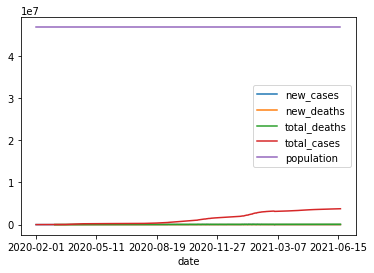

In [8]:

df_spain.plot()

In [35]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import gridspec
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.dates as md
from datetime import date
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

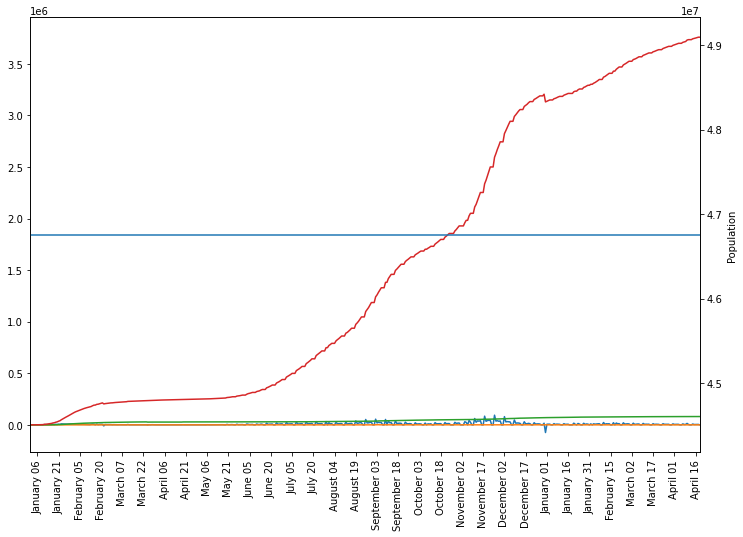

In [40]:

fig, ax = plt.subplots(figsize = (12,8 ))
ax.plot(df_spain.index, df_spain.new_cases, label = "new cases")
ax.plot(df_spain.index, df_spain.new_deaths, label = "new cases")
ax.plot(df_spain.index, df_spain.total_deaths, label = "total_deaths")
ax.plot(df_spain.index, df_spain.total_cases, label = "total_cases")

ax2 = ax.twinx()
ax2.plot(df_spain.index, df_spain.population, label= "Population")
ax2.set_ylabel("Population")
# formatting xaxis
ax.xaxis.set_major_locator(md.DayLocator(interval = 15))
ax.xaxis.set_major_formatter(md.DateFormatter('%B %d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90 )
ax.set_xlim([df_spain.index[0], df_spain.index[-1]])

plt.show()





In [7]:
df_spain = df_spain.drop('population',1)

In [8]:
df_spain

,new_cases,new_deaths,total_deaths,total_cases
date,,,,
2020-03-03,45.0,1.0,1.0,165.0
2020-03-04,57.0,1.0,2.0,222.0
2020-03-05,37.0,1.0,3.0,259.0
2020-03-06,141.0,2.0,5.0,400.0
2020-03-07,100.0,5.0,10.0,500.0
...,...,...,...,...
2021-06-15,3432.0,62.0,80579.0,3745199.0
2021-06-16,3832.0,36.0,80615.0,3749031.0
2021-06-17,4197.0,19.0,80634.0,3753228.0


In [12]:
Entrena los algoritmos de regresión que hemos visto hasta ahora para predecir dos columnas por separado: Nuevos casos y Nuevos fallecidos. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento. ¿Qué error se comete? ¿crees que los algoritmos de ML vistos hasta ahora son buenos para realizar un forecast de una serie temporal viendo los resultados?



Object `resultados` not found.


## Nuevos casos 

In [71]:
y = df_spain["new_cases"]
#y = np.array(y).reshape(-1, 1)
X = df_spain.drop("new_cases", 1)
print(y.shape)
print(X.shape)

(474,)
(474, 3)


In [72]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.svm import SVR

import numpy as np

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
Regresión Lineal, non-linear Polinómica, SVR, Decission Tree Regressor, Ramdon forest Regressor

In [74]:
models = {
    "Linear_Regression": LinearRegression(),
    "Random_Forest": RandomForestRegressor(),
    "DecisionTreeRegresor": DecisionTreeRegressor(),
     "Support Vector Regression": SVR()
   
}

In [75]:

k_fold = RepeatedKFold(n_splits=20, n_repeats=3, random_state=1)
regr_model = []
val_score = []
train_score = []
y_pred = []

for label, model in models.items():

    for i, (train, val) in enumerate(k_fold.split(X_train)):
    
        clf = model
        regr_model.append(clf)
        clf.fit(X_train.iloc[train], y_train.iloc[train])
        score_val = clf.score(X_train.iloc[val], y_train.iloc[val])
        val_score.append(score_val)
        score_train = clf.score(X_train.iloc[train], y_train.iloc[train])
        train_score.append(score_train)
        
        model_score = clf.score(X_test, y_test)
      
        y_pred = clf.predict(X_test)
        
       
   
        

In [76]:
df = pd.DataFrame({'regr_model':regr_model, 'val_score' : val_score, 'train_score':train_score})

In [77]:
# Para el Polinomial Model he hecho una funcion separada, por que me salia un error al unirla
degree = 6

polinominal_model = PolynomialFeatures(degree) 
X_poly = polinominal_model.fit_transform(X, y)



In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size=0.2)

In [79]:
k_fold = RepeatedKFold(n_splits=20, n_repeats=3, random_state=1)
regr_model_1 = []
val_score_1 = []
train_score_1 = []
y_pred_1 = []

linear_regression = LinearRegression()

for label, model in models.items():

    for i, (train, val) in enumerate(k_fold.split(X_train)):
    
        clf = linear_regression
        regr_model_1.append(polinominal_model)
        clf.fit(X_train[train], y_train[train])
        score_val_1 = clf.score(X_train[val], y_train[val])
        val_score_1.append(score_val)
        score_train = clf.score(X_train[train], y_train[train])
        train_score_1.append(score_train)
        y_pred_1 = clf.predict(X_test)

In [80]:
df_1 = pd.DataFrame({'regr_model':regr_model_1, 'val_score' : val_score_1, 'train_score':train_score_1})

In [82]:
cv_newcases = pd.concat([df, df_1], axis=0)
cv_newcases

,regr_model,val_score,train_score
0,LinearRegression(),0.599040,0.202293
1,LinearRegression(),-5.689558,0.233089
2,LinearRegression(),-0.168980,0.249910
3,LinearRegression(),-0.111553,0.218736
4,LinearRegression(),0.450974,0.201392
...,...,...,...
235,PolynomialFeatures(degree=6),-0.275687,0.639825
236,PolynomialFeatures(degree=6),-0.275687,0.626559
237,PolynomialFeatures(degree=6),-0.275687,0.631895
238,PolynomialFeatures(degree=6),-0.275687,0.628115


In [15]:
## Predicciones
df_pred = pd.DataFrame({"new_cases":y_test, "prediction": y_pred})
df_pred["acierto"] = np.where(df_pred["new_cases"] == df_pred["prediction"], True, False)

In [16]:
df_pred

,new_cases,prediction,acierto
date,,,
2021-05-05,6317.0,4166.858638,False
2021-05-17,11061.0,4166.251124,False
2020-03-12,0.0,4083.853706,False
2021-06-14,8167.0,4164.846437,False
2020-04-11,4754.0,4085.537220,False
...,...,...,...
2020-09-12,0.0,4094.275357,False
2020-08-25,7117.0,4090.224596,False
2021-01-01,0.0,4146.461521,False


In [ ]:
Regresión Lineal, non-linear Polinómica, SVR, Decission Tree Regressor, Ramdon forest Regressor

## Nuevas Muertes

In [86]:
df_spain

,new_cases,new_deaths,total_deaths,total_cases
date,,,,
2020-03-03,45.0,1.0,1.0,165.0
2020-03-04,57.0,1.0,2.0,222.0
2020-03-05,37.0,1.0,3.0,259.0
2020-03-06,141.0,2.0,5.0,400.0
2020-03-07,100.0,5.0,10.0,500.0
...,...,...,...,...
2021-06-15,3432.0,62.0,80579.0,3745199.0
2021-06-16,3832.0,36.0,80615.0,3749031.0
2021-06-17,4197.0,19.0,80634.0,3753228.0


In [87]:
y = df_spain["new_deaths"]
#y = np.array(y).reshape(-1, 1)
X = df_spain.drop("new_deaths", 1)
print(y.shape)
print(X.shape)

(474,)
(474, 3)


In [88]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

import numpy as np

In [58]:
df_spain = df_spain.dropna()

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [90]:
models = {
    "Linear_Regression": LinearRegression(),
    "Random_Forest": RandomForestRegressor(),
    "DecisionTreeRegresor": DecisionTreeRegressor(),
     "Support Vector Regression": SVR(), 
   
}

In [91]:
k_fold = RepeatedKFold(n_splits=20, n_repeats=3, random_state=1)
regr_model = []
val_score = []
train_score = []
y_pred = []

for label, model in models.items():

    for i, (train, val) in enumerate(k_fold.split(X_train)):
    
        clf = model
        regr_model.append(clf)
        clf.fit(X_train.iloc[train], y_train.iloc[train])
        score_val = clf.score(X_train.iloc[val], y_train.iloc[val])
        val_score.append(score_val)
        score_train = clf.score(X_train.iloc[train], y_train.iloc[train])
        train_score.append(score_train)
        
        model_score = clf.score(X_test, y_test)
      
        y_pred = clf.predict(X_test)
        

In [92]:
df_muerte = pd.DataFrame({'regr_model':regr_model, 'val_score' : val_score, 'train_score':train_score})
df_muerte

,regr_model,val_score,train_score
0,LinearRegression(),0.380040,0.278399
1,LinearRegression(),-0.023060,0.311990
2,LinearRegression(),-0.616067,0.307053
3,LinearRegression(),0.333989,0.279449
4,LinearRegression(),0.464794,0.278657
...,...,...,...
235,SVR(),-0.278891,-0.132387
236,SVR(),-0.134700,-0.142730
237,SVR(),-0.088487,-0.137259
238,SVR(),-0.406059,-0.142686


In [93]:
degree = 6

polinominal_model = PolynomialFeatures(degree) 
X_poly = polinominal_model.fit_transform(X, y)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size=0.2)

In [95]:
k_fold = RepeatedKFold(n_splits=20, n_repeats=3, random_state=1)
regr_model_1 = []
val_score_1 = []
train_score_1 = []
y_pred_1 = []

linear_regression = LinearRegression()

for label, model in models.items():

    for i, (train, val) in enumerate(k_fold.split(X_train)):
    
        clf = linear_regression
        regr_model_1.append(polinominal_model)
        clf.fit(X_train[train], y_train[train])
        score_val_1 = clf.score(X_train[val], y_train[val])
        val_score_1.append(score_val)
        score_train = clf.score(X_train[train], y_train[train])
        train_score_1.append(score_train)
        y_pred_1 = clf.predict(X_test)

In [96]:
df_1 = pd.DataFrame({'regr_model':regr_model_1, 'val_score' : val_score_1, 'train_score':train_score_1})

In [97]:
new_deaths = pd.concat([df, df_1], axis=0)
new_deaths

,regr_model,val_score,train_score
0,LinearRegression(),0.599040,0.202293
1,LinearRegression(),-5.689558,0.233089
2,LinearRegression(),-0.168980,0.249910
3,LinearRegression(),-0.111553,0.218736
4,LinearRegression(),0.450974,0.201392
...,...,...,...
235,PolynomialFeatures(degree=6),-0.516419,0.436531
236,PolynomialFeatures(degree=6),-0.516419,0.433771
237,PolynomialFeatures(degree=6),-0.516419,0.432349
238,PolynomialFeatures(degree=6),-0.516419,0.457913


In [24]:
## Predicciones
df_pred = pd.DataFrame({"new_deaths":y_test, "prediction": y_pred})
df_pred["acierto"] = np.where(df_pred["new_deaths"] == df_pred["prediction"], True, False)

In [25]:
df_pred

,new_deaths,prediction,acierto
date,,,
2021-05-05,167.0,76.859824,False
2021-05-17,93.0,76.055060,False
2020-03-12,1.0,44.204632,False
2021-06-14,16.0,74.464729,False
2020-04-11,525.0,45.363106,False
...,...,...,...
2020-09-12,0.0,50.777650,False
2020-08-25,52.0,48.316540,False
2021-01-01,0.0,79.134788,False


Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones = 23 y n_repeats = 7 para este ejercicio y solo para la columna "nuevos casos".

In [26]:
df_spain

,new_cases,new_deaths,total_deaths,total_cases
date,,,,
2020-03-03,45.0,1.0,1.0,165.0
2020-03-04,57.0,1.0,2.0,222.0
2020-03-05,37.0,1.0,3.0,259.0
2020-03-06,141.0,2.0,5.0,400.0
2020-03-07,100.0,5.0,10.0,500.0
...,...,...,...,...
2021-06-15,3432.0,62.0,80579.0,3745199.0
2021-06-16,3832.0,36.0,80615.0,3749031.0
2021-06-17,4197.0,19.0,80634.0,3753228.0


In [27]:
y = df_spain["new_cases"]
#y = np.array(y).reshape(-1, 1)
X = df_spain.drop("new_cases", 1)
print(y.shape)
print(X.shape)

(474,)
(474, 3)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
models = {
    "Linear_Regression": LinearRegression(),
    "Random_Forest": RandomForestRegressor(),
    "DecisionTreeRegresor": DecisionTreeRegressor(),
     "Support Vector Regression": SVR()
   
}

In [29]:
k_fold = RepeatedKFold(n_splits=23, n_repeats=7, random_state=1)
regr_model = []
val_score = []
train_score = []
y_pred = []

for label, model in models.items():

    for i, (train, val) in enumerate(k_fold.split(X_train)):
    
        clf = model
        regr_model.append(clf)
        clf.fit(X_train.iloc[train], y_train.iloc[train])
        score_val = clf.score(X_train.iloc[val], y_train.iloc[val])
        val_score.append(score_val)
        score_train = clf.score(X_train.iloc[train], y_train.iloc[train])
        train_score.append(score_train)
        model_score = clf.score(X_test, y_test)
        y_pred = clf.predict(X_test)
      
           
        #accuracies = cross_val_score(
            #estimator=clf, X=X_train, y=y_train, cv=5, verbose=1)
            
        score = clf.score(X_test, y_test)

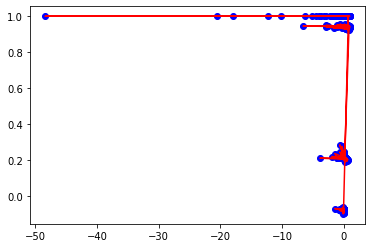

In [30]:
#X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train[train], y_train[train])))
plt.scatter(val_score, train_score, color='b')
#X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
plt.plot(val_score, train_score, color='red')
#plt.title("Poninominal degree " + str(degree))
plt.show()

In [85]:
## FUNCION UNIDOS TODOS LOS MODELOS -- ME SALE ERROR 

k_fold = RepeatedKFold(n_splits=20, n_repeats=3, random_state=1)
regr_model = []
val_score = []
train_score = []
y_pred = []
mae = []
rmse = []
for label, model in models.items():
    if label == "Polinominal_model":
        clf = model
        X_poly = clf.fit_transform(X, y)
        X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size=0.2)
        for i, (train, val) in enumerate(k_fold.split(X_train)):
        
            clf = LinearRegression()
            regr_model.append(model)
            clf.fit(X_train[train], y_train[train])
            score_val = clf.score(X_train[val], y_train[val])
            val_score.append(score_val)
            score_train = clf.score(X_train[train], y_train[train])
            train_score.append(score_train)
            model_score = clf.score(X_test, y_test)
            y_pred = clf.predict(X_test)        
            score = clf.score(X_test, y_test)


    elif label != "Polinominal_model":
        for i, (train, val) in enumerate(k_fold.split(X_train)):
        
            clf = model
            regr_model.append(clf)
            clf.fit(X_train.iloc[train], y_train.iloc[train])
            score_val = clf.score(X_train.iloc[val], y_train.iloc[val])
            val_score.append(score_val)
            score_train = clf.score(X_train.iloc[train], y_train.iloc[train])
            train_score.append(score_train)
            model_score = clf.score(X_test, y_test)
            y_pred = clf.predict(X_test)        
            score = clf.score(X_test, y_test)
            

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'